# One-factor analysis of variance (one-way ANOVA)

# In brevi

The purpose of this repository is to illustrate a one-factor analysis of variance (one-way ANOVA). In addition, there are statistical and graphical analyses.

# Methodology

Various data munging operations are performed using pandas. Various statistical analyses are performed using statsmodels, scipy, and numpy.

# Data

Download the data file.

[anova_one_factor.csv](https://drive.google.com/open?id=1smA0Brf2BiHUugRUhQWCiEj5hbyYv1DS)

# Methodology

Various data munging operations are performed using pandas.

In [1]:
from datetime import datetime
start_time = datetime.now()

In [2]:
# Import the required librairies.
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import numpy as np

/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# Declare constants
confidence_level = 0.95
bootstrap_number_samples = 10000

In [4]:
# Read the data file.
# y is the column of response values.
# x is the column of factor levels, as numbers.
# w is the column of factor levels, as text.
df = pd.read_csv('anova_one_factor.csv')
df.columns

Index(['y', 'x', 'w'], dtype='object')

In [5]:
# How many levels for factor x?
df['x'].unique()

array([1])

In [6]:
# How many levels for factor w?
df['w'].unique()

array([1])

In [7]:
# Calculate basic statistics for y by group within x.
groupby_x = df['y'].groupby(df['x'])
groupby_x.describe()

,count,mean,std,min,25%,50%,75%,max
x,,,,,,,,
1,12.0,13.75,9.166391,2.0,7.25,12.5,20.5,27.0


In [8]:
# Calculate basic statistics for y by group within w.
groupby_w = df['y'].groupby(df['w'])
groupby_w.describe()

,count,mean,std,min,25%,50%,75%,max
w,,,,,,,,
1,12.0,13.75,9.166391,2.0,7.25,12.5,20.5,27.0


In [9]:
def average_ci(data):
    average_conf_int = sm.stats.DescrStatsW(data).\
                        tconfint_mean(alpha=1-confidence_level,
                                      alternative='two-sided')
    average_conf_int = (round(average_conf_int[0], 3),
                        round(average_conf_int[1], 3))
    return average_conf_int

In [10]:
def std_dev_ci(data):
    numerator = (data.count() - 1) * data.var()
    lower_limit = np.sqrt((numerator / \
                           st.chi2.ppf((1 - confidence_level)/2,
                                       data.count() - 1)))
    upper_limit = np.sqrt(numerator / \
                          st.chi2.ppf((1- (1 - confidence_level)/2),
                                      data.count() - 1))
    std_dev_conf_int = lower_limit, upper_limit
    std_dev_conf_int = (round(std_dev_conf_int[0], 3),
                        round(std_dev_conf_int[1], 3))
    return std_dev_conf_int

In [11]:
#def bootstrap(data, statistic, confidence_level):
#    n = len(data)
#    idx = np.random.randint(0, n, (10000, n))
#    samples = data[idx]
#    stat = np.sort(statistic(samples, 1))
#    return (stat[int(((1 - confidence_level)/2) * number_samples)],
#            stat[int(((1 - (1- confidence_level)/2)) * number_samples)])

In [12]:
#def median_ci(data):
#    low, high = bootstrap(data, np.median, confidence_level)
#    median_conf_int = low, high
#    return median_conf_int

In [13]:
def median_ci(data):
    iqr = data.quantile(q=0.75, interpolation='midpoint') - \
          data.quantile(q=0.25, interpolation='midpoint')
    margin_of_error = 1.57 * iqr / np.sqrt(data.count())
    lower_limit = data.median() - margin_of_error
    upper_limit = data.median() + margin_of_error
    median_conf_int = lower_limit, upper_limit
    median_conf_int = (round(median_conf_int[0], 3),
                       round(median_conf_int[1], 3))
    return median_conf_int

In [14]:
def iqr(data):
    q1 = data.quantile(.25, interpolation='midpoint')
    q2 = data.quantile(.50, interpolation='midpoint')
    q3 = data.quantile(.75, interpolation='midpoint')
    iqr = q3 - q1
    q1 = round(q1, 3)
    q2 = round(q2, 3)
    q3 = round(q3, 3)
    iqr = round(iqr,3)
    return q1, q2, q3, iqr

In [15]:
# Calculate specific statistics for y by group.
average_ci.__name__ = 'mean ci'
std_dev_ci.__name__ = 'std dev ci'
median_ci.__name__ = 'median ci'
iqr.__name__ = 'iqr'
f = {'y' : ['count', 'mean', average_ci, 'median', median_ci, iqr, 'std', std_dev_ci]}
grouped = df.groupby(['x', 'w']).agg(f)
# Create better names for the columns:
grouped.columns = [" ".join(x) for x in grouped.columns.ravel()]
grouped.round(3)

,,y count,y mean,y mean ci,y median,y median ci,y iqr,y std,y std dev ci
x,w,,,,,,,,
1,1,12,13.75,"(7.926, 19.574)",12.5,"(5.475, 19.525)","(6.5, 12.5, 22.0, 15.5)",9.166,"(15.563, 6.493)"


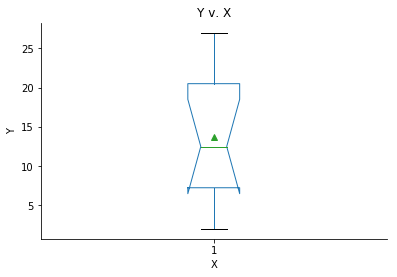

In [16]:
# Plot a box plot of y v. x.
# Add the "magic function" to render figures in a Jupyter notebook.
# This is not required in a Python script file.
%matplotlib inline
ax = df.boxplot(column='y', by='x', grid=False, notch=True,\
                       showmeans=True)
ax.get_figure().suptitle("")
ax.set_title('Y v. X')
ax.set_ylabel('Y')
ax.set_xlabel('X')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

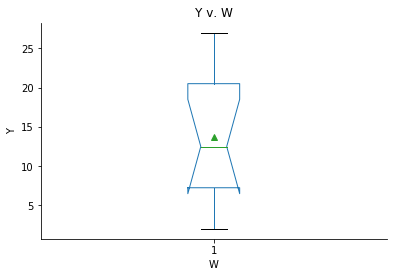

In [17]:
# Plot a box plot of y v. w.
# Add the "magic function" to render figures in a Jupyter notebook.
# This is not required in a Python script file.
%matplotlib inline
ax = df.boxplot(column='y', by='w', grid=False, notch=True,\
                       showmeans=True)
ax.get_figure().suptitle("")
ax.set_title('Y v. W')
ax.set_ylabel('Y')
ax.set_xlabel('W')
for spine in 'right', 'top':
    ax.spines[spine].set_color('none')

In [18]:
# C(x) refers to x as a categorical variable.
model_x = sm.formula.ols('y ~ C(x)',data=df).fit()
anova_x_table = sm.stats.anova_lm(model_x, typ=1)
anova_x_table

/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(x),0.0,0.00,NaN,NaN,NaN
Residual,11.0,924.25,84.022727,NaN,NaN


In [19]:
#model_x.summary() # For non-categorical X.
model_x.summary2() # For categorical X.

/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.000  
Dependent Variable: y                AIC:                88.1834
Date:               2018-08-21 21:38 BIC:                88.6683
No. Observations:   12               Log-Likelihood:     -43.092
Df Model:           0                F-statistic:        nan    
Df Residuals:       11               Prob (F-statistic): nan    
R-squared:          0.000            Scale:              84.023 
-----------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
-----------------------------------------------------------------
Intercept      13.7500    2.6461  5.1963  0.0003  7.9260  19.5740
----------------------------------------------------------------
Omnibus:               2.400       Durbin-Watson:          0.098
Prob(Omnibus):         0.301       Jarque-Bera (JB):       0.994
Skew:                  0.184       Prob(JB):               0.608
Kurtosis:              1.639       Condition No.:          1    
================================================================

"""

In [20]:
# C(w) refers to w as a categorical variable.
model_w = sm.formula.ols('y ~ C(w)',data=df).fit()
anova_w_table = sm.stats.anova_lm(model_w, typ=1)
anova_w_table

/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(w),0.0,0.00,NaN,NaN,NaN
Residual,11.0,924.25,84.022727,NaN,NaN


In [21]:
#model_w.summary() # For non-categorical X.
model_w.summary2() # For categorical X.

/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))
/home/gilles/.pyenv/versions/3.6.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.000  
Dependent Variable: y                AIC:                88.1834
Date:               2018-08-21 21:38 BIC:                88.6683
No. Observations:   12               Log-Likelihood:     -43.092
Df Model:           0                F-statistic:        nan    
Df Residuals:       11               Prob (F-statistic): nan    
R-squared:          0.000            Scale:              84.023 
-----------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
-----------------------------------------------------------------
Intercept      13.7500    2.6461  5.1963  0.0003  7.9260  19.5740
----------------------------------------------------------------
Omnibus:               2.400       Durbin-Watson:          0.098
Prob(Omnibus):         0.301       Jarque-Bera (JB):       0.994
Skew:                  0.184       Prob(JB):               0.608
Kurtosis:              1.639       Condition No.:          1    
================================================================

"""

In [22]:
end_time = datetime.now()
(end_time - start_time).total_seconds()

2.860753

# Future work

- Calculate Tukey post hoc means comparison.
- Calculate average and CI, median and CI, standard deviation and CI, for all levels of y v. x and w.

# References

[pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)

[statsmodels](https://www.statsmodels.org/stable/index.html)

[scipy](https://docs.scipy.org/doc/scipy/reference/)

[numpy](https://docs.scipy.org/doc/numpy/reference/)